# Learn XOR using a Neural Network

For demonstration purposes, we learn neural network models of increasing complexity implementing the XOR function. Eventually, we will arrive at the model suggested in this [tutorial](https://blog.thoughtram.io/machine-learning/2016/11/02/understanding-XOR-with-keras-and-tensorlow.html).

## Imports

In [1]:
#!pip install numpy 
#!pip install tensorflow 
#!pip install sklearn 

In [2]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, accuracy_score

import matplotlib.pyplot as plt

## Create the XOR function as data

In [3]:
# Create XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Y = np.array([[0],[1],[1],[0]], "float32")

# Dataset shape
print("Input: {0}".format(X.shape))
print("Output: {0}".format(Y.shape))

Input: (4, 2)
Output: (4, 1)


## Model 1

Define and train a too trivial neural network model: one neuron, three parameters, purely linear and, hence, it misses 50% of the right answers.

In [4]:
# Define the model
model1 = Sequential()
model1.add(Dense(1, input_dim=2, activation='linear'))

# Compile the model
model1.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


2024-04-22 17:58:06.362766: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-04-22 17:58:31.972452: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


[]

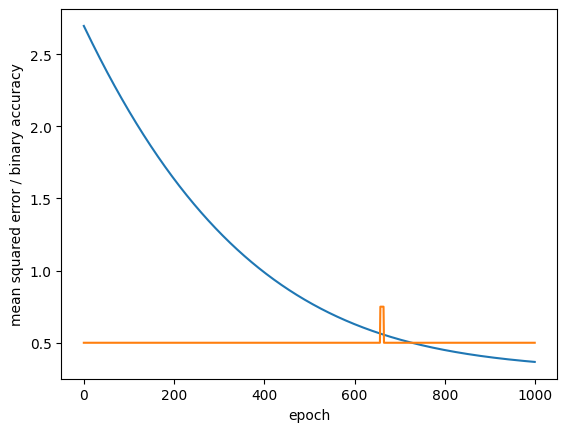

In [5]:
# Train the model
history = model1.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [6]:
preds = model1.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.37
Binary accuracy: 0.50


In [7]:
preds

array([[0.61704695],
       [0.71605337],
       [0.00191498],
       [0.10092139]], dtype=float32)

Use the model

In [8]:
def my_xor(x1,x2,m):
    """Return x1 XOR x2."""
    res =  m.predict(np.array([[x1,x2]], "float32")).round()
    return int(res[0][0])

In [9]:
print(format(my_xor(0,0, model1)))
print(format(my_xor(0,1, model1)))
print(format(my_xor(1,0, model1)))
print(format(my_xor(1,1, model1)))

1
1
0
0


## Model 2

The slightly more complex neural network model introduces a sigmpod activation function. It is hence not linear anymore. However, one neuron is not enough. Its accuracy does not improve.

In [10]:
# Define the model
model2 = Sequential()
model2.add(Dense(1, input_dim=2, activation='sigmoid'))

# Compile the model
model2.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


[]

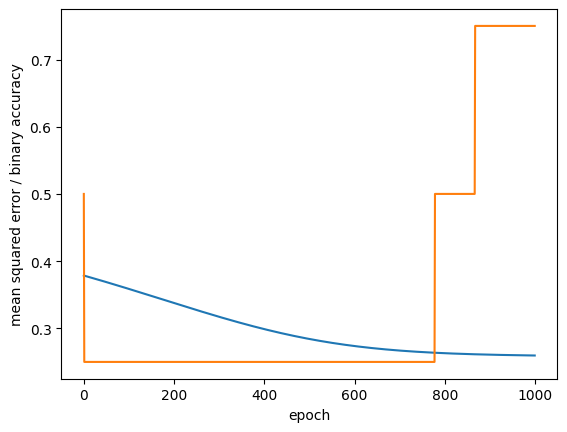

In [11]:
# Train the model
history = model2.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [12]:
preds = model2.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.26
Binary accuracy: 0.75


In [13]:
preds

array([[0.66249526],
       [0.5304991 ],
       [0.5162148 ],
       [0.38050535]], dtype=float32)

Use the model

In [14]:
print(format(my_xor(0,0, model2)))
print(format(my_xor(0,1, model2)))
print(format(my_xor(1,0, model2)))
print(format(my_xor(1,1, model2)))

1
1
1
0


## Model 3

We add a hidden layer with 32 neurons and a linear activation function:

In [15]:
# Define the model
model3 = Sequential()
model3.add(Dense(32, input_dim=2, activation='linear'))
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None


[]

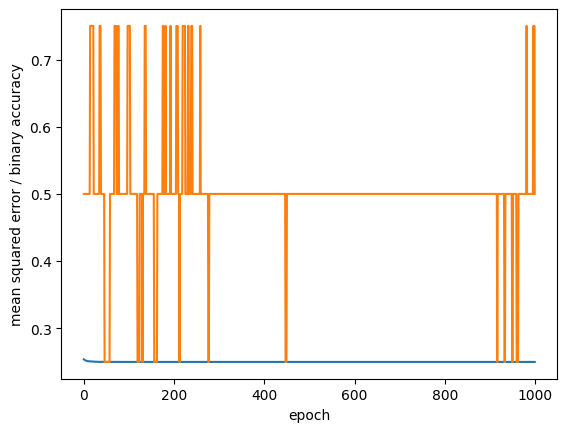

In [16]:
# Train the model
history = model3.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [17]:
preds = model3.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.25
Binary accuracy: 0.50


In [18]:
preds

array([[0.5       ],
       [0.5       ],
       [0.5       ],
       [0.49999997]], dtype=float32)

Use the model

In [19]:
print(format(my_xor(0,0, model3)))
print(format(my_xor(0,1, model3)))
print(format(my_xor(1,0, model3)))
print(format(my_xor(1,1, model3)))

0
0
0
0


## Model 4

Finally we change the linear activation of the hidden layer to a relu activation, define and train the neural network model:

In [20]:
# Define the model
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
None


[]

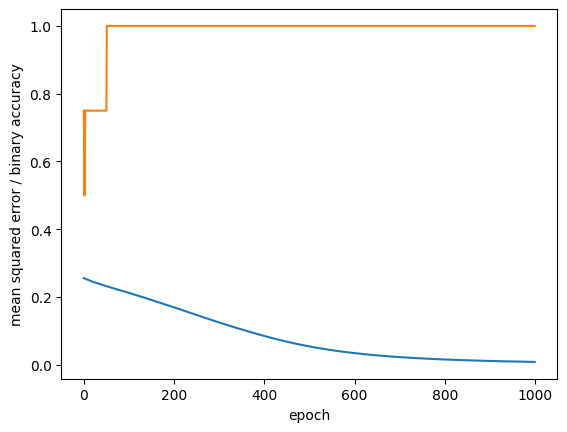

In [21]:
# Train the model
history = model.fit(X, Y, epochs=1000, verbose=0)

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['binary_accuracy'])
plt.ylabel('mean squared error / binary accuracy')
plt.xlabel('epoch')
plt.plot()

Evaluate the model:

In [22]:
preds = model.predict(X)
mse = mean_squared_error(preds, Y)
print("Mean squared error: {0:.2f}".format(mse))
acc = accuracy_score(preds.round(), Y)
print("Binary accuracy: {0:.2f}".format(acc))

Mean squared error: 0.01
Binary accuracy: 1.00


In [23]:
preds

array([[0.10768834],
       [0.9147122 ],
       [0.9154642 ],
       [0.08423236]], dtype=float32)

Use the model

In [24]:
print(format(my_xor(0,0, model)))
print(format(my_xor(0,1, model)))
print(format(my_xor(1,0, model)))
print(format(my_xor(1,1, model)))

0
1
1
0


In [25]:
model.trainable_weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 32) dtype=float32, numpy=
 array([[-0.4140253 , -0.66599417,  0.61608714, -0.8025244 ,  0.05717328,
         -0.17344958,  0.13202691, -0.4168494 , -0.2136913 , -0.17266054,
          0.05302856,  0.8652885 ,  0.04716446, -0.6160943 ,  0.04601227,
         -0.74179184,  0.5451424 ,  0.5410907 ,  0.15234342,  0.94121903,
         -0.03473845, -0.36214018,  0.5940952 ,  0.80241185, -0.19312467,
         -0.21032165, -0.6954469 , -0.39906874, -0.34100628,  0.71904904,
          0.53420806, -0.18828306],
        [-0.22180732,  0.66597694, -0.61595464,  0.80298597, -0.37248346,
         -0.24839139,  0.5864417 , -0.34382787, -0.1041829 , -0.1038585 ,
         -0.34521604, -0.8650967 , -0.10190623,  0.6162172 ,  0.3373461 ,
          0.74181074, -0.5451396 , -0.541055  ,  0.16021958, -0.9411389 ,
         -0.01800102, -0.2478241 ,  0.57978076, -0.80235595,  0.27068588,
         -0.11096957,  0.69538635, -0.32768065, -0.3070084 , -0.7189413 ,
       